## –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å–æ —Å–ø–∞—Ä—Å–µ–Ω–Ω—ã–º–∏ —Å—Ç–∞—Ç—å—è–º–∏ —Ö–∞–±—Ä

___

### 1. –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [3]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df =pd.read_csv("habr_parsing.csv")

In [5]:
df.head()

title         namecompany  \
0  SSTI –≤ Python –ø–æ–¥ –º–∏–∫—Ä–æ—Å–∫–æ–ø–æ–º: —Ä–∞–∑–±–∏—Ä–∞–µ–º Pytho...             BI.ZONE   
1                –ü—Ä–æ—Ç–∏–≤–æ–≤–∏—Ä—É—Å–Ω–∞—è –∂–µ–≤–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–∑–∏–Ω–∫–∞  ua-hosting.company   
2  Keycloak: –∫–∞–∫ —É–ø—Ä–æ—Å—Ç–∏—Ç—å –∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é –∏ –Ω–µ —Å–æ...           Clevertec   
3  –ò–∑ —á–µ–≥–æ —Å–¥–µ–ª–∞–Ω—ã GPU –æ—Ç –¢1 –û–±–ª–∞–∫–æ? –§–æ—Ç–æ–æ–±–∑–æ—Ä –∏ ...          –•–æ–ª–¥–∏–Ω–≥ –¢1   
4  –§—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –Ω–∞—É–∫–∏ –∏ –ò–¢: —Å–æ–∑–¥–∞–Ω–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞...             –ò–Ω—Ñ–µ—Ä–∏—Ç   

                                        description  rating  \
0                                          –ö–æ–º–ø–∞–Ω–∏—è   76.41   
1     –•–æ—Å—Ç–∏–Ω–≥-–ø—Ä–æ–≤–∞–π–¥–µ—Ä: —Å–µ—Ä–≤–µ—Ä—ã –≤ NL –¥–æ 300 –ì–±–∏—Ç/—Å  169.07   
2  –¶–∏—Ñ—Ä–æ–≤—ã–µ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è –±–∏–∑–Ω–µ—Å–∞ | —Ñ–∏–Ω—Ç–µ—Ö, –ª–æ–≥–∏—Å—Ç–∏–∫–∞   59.14   
3                        –ú–Ω–æ–≥–æ–ø—Ä–æ—Ñ–∏–ª—å–Ω—ã–π –ò–¢-—Ö–æ–ª–¥–∏–Ω–≥  125.41   
4                                          –ö–æ–º–ø–∞–Ω–∏—è  229.82   

                                               field        date  \
0  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –í–µ–±-—Å–µ—Ä–≤–∏—Å—ã, –ò–Ω—Ñ–æ—Ä–º–∞—Ü...  2025-04-09   
1  –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –°–≤—è–∑—å –∏ —Ç–µ–ª–µ–∫–æ–º–º—É–Ω–∏–∫–∞—Ü...  2025-04-09   
2  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ú–æ–±–∏–ª—å–Ω—ã–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏,...  2025-04-09   
3  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏...  2025-04-09   
4    –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ  2025-04-09   

                                             textpub  views  
0  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä! –ú–µ–Ω—è –∑–æ–≤—É—Ç –°–µ—Ä–≥–µ–π –ê—Ä–µ—Ñ—å–µ–≤. –Ø —Å–ø–µ...    NaN  
1    –ü–∞–Ω–¥–µ–º–∏—è, –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±...    NaN  
2  –ü—Ä–∏–≤–µ—Ç! –Ø –î–∏–∞–Ω–∞, —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ Cleverte...    NaN  
3  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä. –ù–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ –¢1 –û–±–ª–∞–∫–æ. –ï—Å–ª–∏...    NaN  
4  –†–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π ‚Äî –æ—Ç –ø–µ—Ä–≤—ã—Ö...    NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        90 non-null     object 
 1   namecompany  90 non-null     object 
 2   description  90 non-null     object 
 3   rating       90 non-null     float64
 4   field        89 non-null     object 
 5   date         90 non-null     object 
 6   textpub      90 non-null     object 
 7   views        0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 5.8+ KB


In [7]:
df = df.drop(columns="views")

___

### 2. –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

1. –ü–µ—Ä–µ–≤–æ–¥ –≤—Å–µ—Ö –±—É–∫–≤ –≤ —Ç–µ–∫—Å—Ç–µ –≤ –Ω–∏–∂–Ω–∏–π —Ä–µ–≥–∏—Å—Ç—Ä
2. –£–¥–∞–ª–µ–Ω–∏–µ –∑–Ω–∞–∫–æ–≤ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è
3. –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –ø–æ —Å–ª–æ–≤–∞–º
4. –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø —Å–ª–æ–≤
5. –°—Ç–µ–º–º–∏–Ω–≥ (–ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Å–ª–æ–≤ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ)
6. –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è

In [8]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '‚ùØ\xa0‚Äî¬´¬ª'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [9]:
df['text_new'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['textpub']]

In [10]:
df.head()

title         namecompany  \
0  SSTI –≤ Python –ø–æ–¥ –º–∏–∫—Ä–æ—Å–∫–æ–ø–æ–º: —Ä–∞–∑–±–∏—Ä–∞–µ–º Pytho...             BI.ZONE   
1                –ü—Ä–æ—Ç–∏–≤–æ–≤–∏—Ä—É—Å–Ω–∞—è –∂–µ–≤–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–∑–∏–Ω–∫–∞  ua-hosting.company   
2  Keycloak: –∫–∞–∫ —É–ø—Ä–æ—Å—Ç–∏—Ç—å –∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é –∏ –Ω–µ —Å–æ...           Clevertec   
3  –ò–∑ —á–µ–≥–æ —Å–¥–µ–ª–∞–Ω—ã GPU –æ—Ç –¢1 –û–±–ª–∞–∫–æ? –§–æ—Ç–æ–æ–±–∑–æ—Ä –∏ ...          –•–æ–ª–¥–∏–Ω–≥ –¢1   
4  –§—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –Ω–∞—É–∫–∏ –∏ –ò–¢: —Å–æ–∑–¥–∞–Ω–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞...             –ò–Ω—Ñ–µ—Ä–∏—Ç   

                                        description  rating  \
0                                          –ö–æ–º–ø–∞–Ω–∏—è   76.41   
1     –•–æ—Å—Ç–∏–Ω–≥-–ø—Ä–æ–≤–∞–π–¥–µ—Ä: —Å–µ—Ä–≤–µ—Ä—ã –≤ NL –¥–æ 300 –ì–±–∏—Ç/—Å  169.07   
2  –¶–∏—Ñ—Ä–æ–≤—ã–µ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è –±–∏–∑–Ω–µ—Å–∞ | —Ñ–∏–Ω—Ç–µ—Ö, –ª–æ–≥–∏—Å—Ç–∏–∫–∞   59.14   
3                        –ú–Ω–æ–≥–æ–ø—Ä–æ—Ñ–∏–ª—å–Ω—ã–π –ò–¢-—Ö–æ–ª–¥–∏–Ω–≥  125.41   
4                                          –ö–æ–º–ø–∞–Ω–∏—è  229.82   

                                               field        date  \
0  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –í–µ–±-—Å–µ—Ä–≤–∏—Å—ã, –ò–Ω—Ñ–æ—Ä–º–∞—Ü...  2025-04-09   
1  –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –°–≤—è–∑—å –∏ —Ç–µ–ª–µ–∫–æ–º–º—É–Ω–∏–∫–∞—Ü...  2025-04-09   
2  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ú–æ–±–∏–ª—å–Ω—ã–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏,...  2025-04-09   
3  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏...  2025-04-09   
4    –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ  2025-04-09   

                                             textpub  \
0  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä! –ú–µ–Ω—è –∑–æ–≤—É—Ç –°–µ—Ä–≥–µ–π –ê—Ä–µ—Ñ—å–µ–≤. –Ø —Å–ø–µ...   
1    –ü–∞–Ω–¥–µ–º–∏—è, –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±...   
2  –ü—Ä–∏–≤–µ—Ç! –Ø –î–∏–∞–Ω–∞, —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ Cleverte...   
3  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä. –ù–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ –¢1 –û–±–ª–∞–∫–æ. –ï—Å–ª–∏...   
4  –†–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π ‚Äî –æ—Ç –ø–µ—Ä–≤—ã—Ö...   

                                            text_new  
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...  
1   –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é...  
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ clevertec ...  
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...  
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...

In [11]:
russian_stopwords = stopwords.words("russian") 
russian_stopwords.extend(['—Ç.–¥.', '—Ç', '–¥', '—ç—Ç–æ','–∫–æ—Ç–æ—Ä—ã–π', '–∫–æ—Ç–æ—Ä–∞—è', '—Å','—Å–≤–æ—ë–º','–≤—Å–µ–º','–Ω–∞—à', '—Å–≤–æ–π', '–µ—â—ë', "–µ—â–µ", "—Ç–∞–∫–∂–µ", "—Ç–∞–∫ –∂–µ", "–≤—Å—è–∫–∏–π"]) 

In [12]:
def tokenize_text(text):
    t = word_tokenize(text)
    tokens = [token for token in t if not re.search(r'[a-zA-Z]', token)]
    text = " ".join(tokens)
    return text

In [13]:
df['tokenize_texts'] = df['text_new'].apply(tokenize_text)

In [14]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_texts']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

In [15]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [16]:
%%time
lemm_texts_list = []
for text in df['tokenize_texts']:
    try:
        tokens = word_tokenize(text)
        res = []
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
        lemm_texts_list.append("")

df['text_lemm'] = lemm_texts_list

CPU times: total: 13.4 s
Wall time: 13.4 s


In [17]:
df.head()

title         namecompany  \
0  SSTI –≤ Python –ø–æ–¥ –º–∏–∫—Ä–æ—Å–∫–æ–ø–æ–º: —Ä–∞–∑–±–∏—Ä–∞–µ–º Pytho...             BI.ZONE   
1                –ü—Ä–æ—Ç–∏–≤–æ–≤–∏—Ä—É—Å–Ω–∞—è –∂–µ–≤–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–∑–∏–Ω–∫–∞  ua-hosting.company   
2  Keycloak: –∫–∞–∫ —É–ø—Ä–æ—Å—Ç–∏—Ç—å –∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é –∏ –Ω–µ —Å–æ...           Clevertec   
3  –ò–∑ —á–µ–≥–æ —Å–¥–µ–ª–∞–Ω—ã GPU –æ—Ç –¢1 –û–±–ª–∞–∫–æ? –§–æ—Ç–æ–æ–±–∑–æ—Ä –∏ ...          –•–æ–ª–¥–∏–Ω–≥ –¢1   
4  –§—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –Ω–∞—É–∫–∏ –∏ –ò–¢: —Å–æ–∑–¥–∞–Ω–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞...             –ò–Ω—Ñ–µ—Ä–∏—Ç   

                                        description  rating  \
0                                          –ö–æ–º–ø–∞–Ω–∏—è   76.41   
1     –•–æ—Å—Ç–∏–Ω–≥-–ø—Ä–æ–≤–∞–π–¥–µ—Ä: —Å–µ—Ä–≤–µ—Ä—ã –≤ NL –¥–æ 300 –ì–±–∏—Ç/—Å  169.07   
2  –¶–∏—Ñ—Ä–æ–≤—ã–µ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è –±–∏–∑–Ω–µ—Å–∞ | —Ñ–∏–Ω—Ç–µ—Ö, –ª–æ–≥–∏—Å—Ç–∏–∫–∞   59.14   
3                        –ú–Ω–æ–≥–æ–ø—Ä–æ—Ñ–∏–ª—å–Ω—ã–π –ò–¢-—Ö–æ–ª–¥–∏–Ω–≥  125.41   
4                                          –ö–æ–º–ø–∞–Ω–∏—è  229.82   

                                               field        date  \
0  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –í–µ–±-—Å–µ—Ä–≤–∏—Å—ã, –ò–Ω—Ñ–æ—Ä–º–∞—Ü...  2025-04-09   
1  –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –°–≤—è–∑—å –∏ —Ç–µ–ª–µ–∫–æ–º–º—É–Ω–∏–∫–∞—Ü...  2025-04-09   
2  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ú–æ–±–∏–ª—å–Ω—ã–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏,...  2025-04-09   
3  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏...  2025-04-09   
4    –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ  2025-04-09   

                                             textpub  \
0  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä! –ú–µ–Ω—è –∑–æ–≤—É—Ç –°–µ—Ä–≥–µ–π –ê—Ä–µ—Ñ—å–µ–≤. –Ø —Å–ø–µ...   
1    –ü–∞–Ω–¥–µ–º–∏—è, –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±...   
2  –ü—Ä–∏–≤–µ—Ç! –Ø –î–∏–∞–Ω–∞, —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ Cleverte...   
3  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä. –ù–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ –¢1 –û–±–ª–∞–∫–æ. –ï—Å–ª–∏...   
4  –†–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π ‚Äî –æ—Ç –ø–µ—Ä–≤—ã—Ö...   

                                            text_new  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1   –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ clevertec ...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                      tokenize_texts  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1  –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                           text_stem  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω –∑–æ–≤—É—Ç —Å–µ—Ä–≥ –∞—Ä–µ—Ñ —è —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ...   
1  –ø–∞–Ω–¥–µ–º –ø–æ—Å–ª–µ–¥—Å—Ç–≤ –∫–æ—Ç–æ—Ä –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥–∞ –ø–æ –≤...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞ —Å–∏—Å—Ç–µ–º–Ω –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø–æ–¥–∞–≤...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑ –∫–æ–º–∞–Ω–¥ —Ç –æ–±–ª–∞–∫ –µ—Å–ª –≤—ã —Å–ª–µ–¥...   
4  —Ä–∞–∑–≤–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω —Ç–µ—Ö–Ω–æ–ª–æ–≥ –æ—Ç –ø–µ—Ä–≤ –∞–ª–≥–æ—Ä–∏—Ç–º –¥...   

                                           text_lemm  
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä–∞ —è –∑–≤–∞—Ç—å —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞–ª–∏...  
1  –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏–µ –∫–æ—Ç–æ—Ä—ã–π –¥

In [18]:
df['text_lemm'] = df['text_lemm'].apply(lambda x: ' '.join([word for word in x.split() if word not in russian_stopwords]))

___

# –û–±–ª–∞–∫–æ —Å–ª–æ–≤

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# –ü–æ–ª—É—á–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤–æ–π —Å—Ç—Ä–æ–∫–∏ –∏–∑ —Å–ø–∏—Å–∫–∞ —Å–ª–æ–≤
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# –ü–æ–ª—É—á–µ–Ω–∏–µ —Å–ø–∏—Å–∫–∞ –≤—Å–µ—Ö —Å–ª–æ–≤ –≤ –∫–æ—Ä–ø—É—Å–µ
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# –ü–æ–ª—É—á–µ–Ω–∏–µ –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

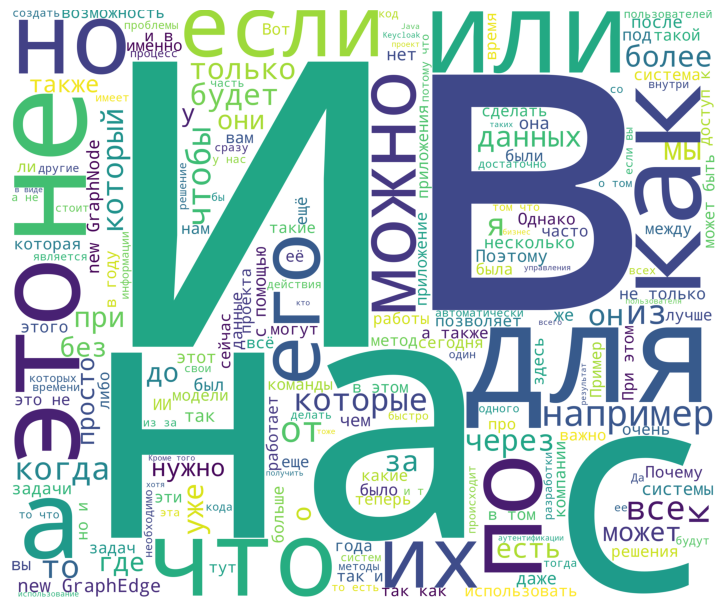

In [21]:
corpus = get_corpus(df['textpub'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

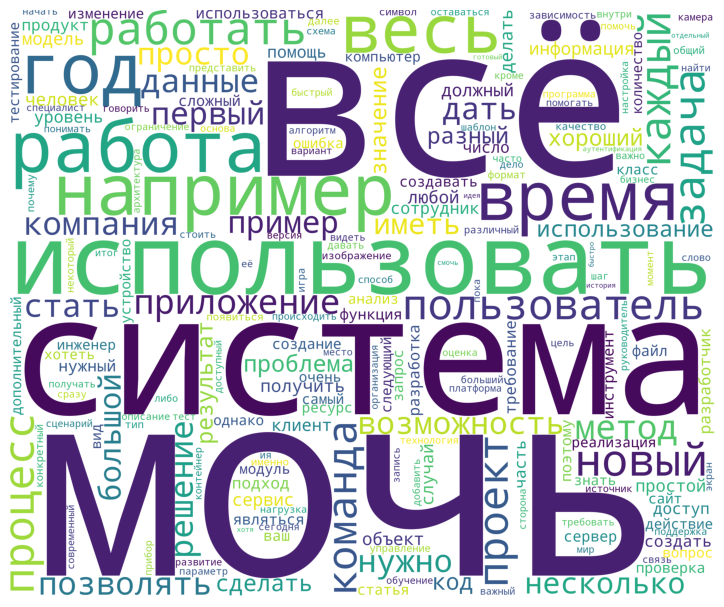

In [22]:
corpus = get_corpus(df['text_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

___

## –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

#### **Bag of words**

–°–º–æ—Ç—Ä–∏–º –Ω–∞–ª–∏—á–∏–µ —Å–ª–æ–≤ –≤ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
df['text_lemm'][0]

'–ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä–∞ –∑–≤–∞—Ç—å —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ—Ç–¥–µ–ª –∞–Ω–∞–ª–∏–∑ –∑–∞—â–∏—â—ë–Ω–Ω–æ—Å—Ç—å –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –∫–æ–º–ø–∞–Ω–∏—è —Å—Ç–∞—Ç—å—è —Ö–æ—Ç–µ—Ç—å –ø–æ–¥—Ä–æ–±–Ω–æ —Ä–∞—Å–∫—Ä—ã—Ç—å —Ç–µ–º–∞ –∫–æ–Ω—Ç–µ–∫—Å—Ç —Å—Ä–∞–∑—É –æ–≥–æ–≤–æ—Ä–∏—Ç—å—Å—è –Ω–æ–≤—ã–π —Ä–µ—Å–µ—Ä—á –≤–µ–∫—Ç–æ—Ä –ª–∏—à—å –≤–∑—è—Ç—å –∏–∑–≤–µ—Å—Ç–Ω—ã–π –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –ø–æ—á–µ–º—É —Ä–∞–±–æ—Ç–∞—Ç—å –ø–æ–ª–Ω—ã–π –ø–æ–Ω–∏–º–∞–Ω–∏–µ –≤–æ–ø—Ä–æ—Å —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –∏–º–ø–∞–∫—Ç –∞—Ç–∞–∫–æ–≤–∞—Ç—å –º–æ—á—å –ø–æ–ª—É—á–∏—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø—è—Ç—å —Å–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π —à–∞–±–ª–æ–Ω–∏–∑–∞—Ç–æ—Ä –∫—Ä–æ–º–µ –Ω–µ–º–Ω–æ–≥–æ —É–≥–ª—É–±–∏—Ç—å—Å—è —Ä–∞–±–æ—Ç–∞ –∏–∑–≤–µ—Å—Ç–Ω—ã–π –ø–æ–¥–µ–ª–∏—Ç—å—Å—è –æ–ø—ã—Ç –≤–∞—Ä–∏–∞–Ω—Ç —É–ª—É—á—à–µ–Ω–∏–µ –º–æ—á—å –ø–æ–ª–µ–∑–Ω—ã–π —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–ª–æ–≤–æ —à–∞–±–ª–æ–Ω–∏–∑–∞—Ç–æ—Ä–∞—Ö–Ω–∞—á–Ω—É—Ç—å –±–∞–∑–æ–≤—ã–π —à–∞–±–ª–æ–Ω–∏–∑–∞—Ç–æ—Ä –ø—Ä–∏–º–µ–Ω—è—Ç—å—Å—è –≤—Å—Ç—Ä–µ—Ç–∏—Ç—å —à–∞–±–ª–æ–Ω–∏–

In [25]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

CountVectorizer()

In [26]:
print(vectorizer.vocabulary_)

{'–ø—Ä–∏–≤–µ—Ç': 7016, '—Ö–∞–±—Ä–∞': 10232, '–∑–≤–∞—Ç—å': 2593, '—Å–µ—Ä–≥–µ–π': 8379, '–∞—Ä–µ—Ñ—å–µ–≤': 264, '—Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç': 8887, '–æ—Ç–¥–µ–ª': 5614, '–∞–Ω–∞–ª–∏–∑': 195, '–∑–∞—â–∏—â—ë–Ω–Ω–æ—Å—Ç—å': 2586, '–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ': 7095, '–∫–æ–º–ø–∞–Ω–∏—è': 3425, '—Å—Ç–∞—Ç—å—è': 9042, '—Ö–æ—Ç–µ—Ç—å': 10300, '–ø–æ–¥—Ä–æ–±–Ω–æ': 6414, '—Ä–∞—Å–∫—Ä—ã—Ç—å': 7789, '—Ç–µ–º–∞': 9355, '–∫–æ–Ω—Ç–µ–∫—Å—Ç': 3516, '—Å—Ä–∞–∑—É': 8965, '–æ–≥–æ–≤–æ—Ä–∏—Ç—å—Å—è': 5304, '–Ω–æ–≤—ã–π': 5046, '—Ä–µ—Å–µ—Ä—á': 8027, '–≤–µ–∫—Ç–æ—Ä': 748, '–ª–∏—à—å': 3901, '–≤–∑—è—Ç—å': 834, '–∏–∑–≤–µ—Å—Ç–Ω—ã–π': 2720, '–ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å': 6723, '–ø–æ—á–µ–º—É': 6799, '—Ä–∞–±–æ—Ç–∞—Ç—å': 7578, '–ø–æ–ª–Ω—ã–π': 6559, '–ø–æ–Ω–∏–º–∞–Ω–∏–µ': 6630, '–≤–æ–ø—Ä–æ—Å': 1063, '—Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å': 7834, '–∏–º–ø–∞–∫—Ç': 2822, '–∞—Ç–∞–∫–æ–≤–∞—Ç—å': 309, '–º–æ—á—å': 4399, '–ø–æ–ª—É—á–∏—Ç—å': 6584, '–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å': 3012, '–ø—è—Ç—å': 7572, '—Å–∞–º—ã–π': 8216, '–ø–æ–ø—É–ª—è—Ä–Ω—ã–π': 6662, '—à–∞–±–ª–æ–Ω–∏–∑–∞—Ç–æ—Ä': 1050

In [27]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['text_lemm'])

In [28]:
count_matrix.shape

(90, 9824)

In [29]:
vectorizer.get_feature_names_out()[45000:46000]

array([], dtype=object)

In [30]:
print(count_matrix)

  (0, 6334)	1
  (0, 9366)	1
  (0, 2301)	1
  (0, 7663)	1
  (0, 8239)	1
  (0, 5085)	1
  (0, 110)	1
  (0, 2297)	1
  (0, 6399)	9
  (0, 3143)	4
  (0, 8417)	3
  (0, 9410)	4
  (0, 5674)	1
  (0, 7166)	1
  (0, 8675)	2
  (0, 3255)	10
  (0, 8310)	3
  (0, 4777)	1
  (0, 4459)	1
  (0, 576)	3
  (0, 3499)	5
  (0, 709)	2
  (0, 2461)	3
  (0, 6075)	3
  (0, 6142)	1
  :	:
  (89, 7124)	1
  (89, 4706)	1
  (89, 6799)	1
  (89, 1655)	1
  (89, 1445)	1
  (89, 8722)	2
  (89, 3917)	1
  (89, 6454)	1
  (89, 4632)	1
  (89, 6455)	1
  (89, 573)	1
  (89, 4472)	1
  (89, 9572)	1
  (89, 9573)	1
  (89, 9806)	1
  (89, 1063)	1
  (89, 5778)	1
  (89, 5445)	1
  (89, 2451)	1
  (89, 616)	2
  (89, 8162)	2
  (89, 19)	2
  (89, 7564)	1
  (89, 3340)	1
  (89, 3341)	1


### **TF-IDF**

–í—ã—á–∏—Å–ª—è–µ–º ¬´–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω—É—é —á–∞—Å—Ç–æ—Ç—É¬ª –ø–æ—è–≤–ª–µ–Ω–∏—è —Å–ª–æ–≤–∞ –≤ –æ–¥–Ω–æ–º –¥–æ–∫—É–º–µ–Ω—Ç–µ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –µ–≥–æ —á–∞—Å—Ç–æ—Ç–æ–π –≤–æ –≤—Å–µ—Ö —Ä–∞–∑–æ–º

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=6,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [33]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])

CPU times: total: 578 ms
Wall time: 574 ms


In [34]:
tfidf_matrix.shape

(90, 6)

In [35]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['–≥–æ–¥', '–¥–∞–Ω–Ω—ã–µ', '–∑–∞–¥–∞—á–∞', '–Ω–æ–≤—ã–π', '–ø—Ä–æ—Ü–µ—Å—Å', '—Å–∏—Å—Ç–µ–º–∞'],
      dtype=object)

In [36]:
print(tfidf_matrix)

  (0, 3)	0.11507559767049533
  (0, 1)	0.8432072516578033
  (0, 0)	0.1291873939292064
  (0, 2)	0.1261827340766584
  (0, 5)	0.49310006331696143
  (1, 3)	0.2570284423624734
  (1, 0)	0.9618266978886086
  (1, 4)	0.09394563877805001
  (2, 3)	0.2372197437556521
  (2, 1)	0.09932621298909443
  (2, 2)	0.026011627530071163
  (2, 5)	0.9656644795436049
  (2, 4)	0.026011627530071163
  (3, 3)	0.15510949993906123
  (3, 1)	0.8118231952189711
  (3, 2)	0.5102421672303562
  (3, 5)	0.16616143167906283
  (3, 4)	0.17008072241011876
  (4, 3)	0.1718058376550135
  (4, 1)	0.179841936357427
  (4, 0)	0.5786235017095951
  (4, 2)	0.7535543856210084
  (4, 4)	0.1883885964052521
  (5, 1)	0.05403236296811318
  (5, 2)	0.05660015247940581
  :	:
  (83, 3)	0.4789380572328083
  (83, 0)	0.3584470308790028
  (83, 2)	0.3501102158834362
  (83, 5)	0.17102118891634152
  (83, 4)	0.7002204317668724
  (84, 2)	0.742759297630081
  (84, 5)	0.20732667664802706
  (84, 4)	0.6366508265400693
  (85, 3)	0.12025655362788006
  (85, 1)	0.1258814

___

## –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

### **K-means**

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


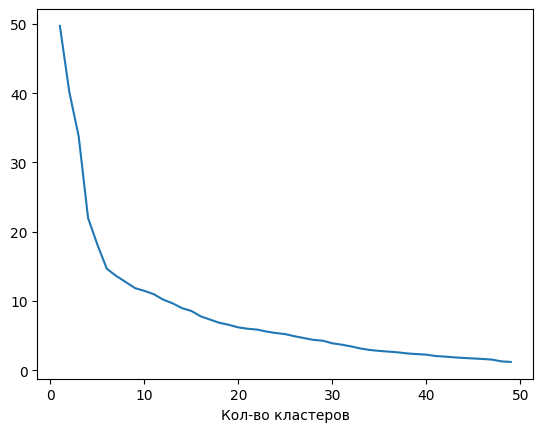

In [38]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.xlabel('–ö–æ–ª-–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤')
plt.show()

In [39]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state = 42)

In [40]:
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [41]:
pred=kmeans.fit_predict(tfidf_matrix)

cluster
2    24
1    23
3    17
0    14
4    12
Name: count, dtype: int64


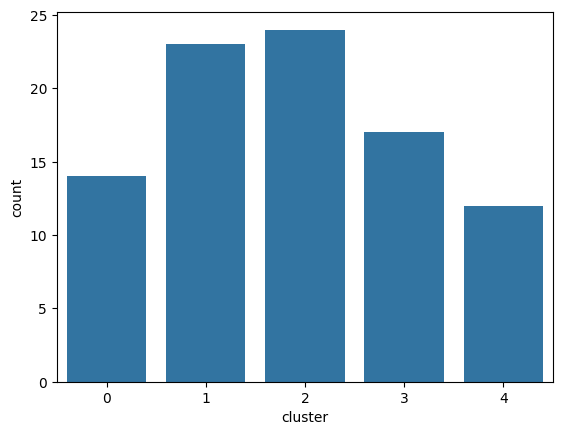

In [42]:
# –°–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
df['cluster'] = pred
print(df['cluster'].value_counts())
sns.countplot(x='cluster', data=df)
plt.show()

In [43]:
df.head()

title         namecompany  \
0  SSTI –≤ Python –ø–æ–¥ –º–∏–∫—Ä–æ—Å–∫–æ–ø–æ–º: —Ä–∞–∑–±–∏—Ä–∞–µ–º Pytho...             BI.ZONE   
1                –ü—Ä–æ—Ç–∏–≤–æ–≤–∏—Ä—É—Å–Ω–∞—è –∂–µ–≤–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–∑–∏–Ω–∫–∞  ua-hosting.company   
2  Keycloak: –∫–∞–∫ —É–ø—Ä–æ—Å—Ç–∏—Ç—å –∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é –∏ –Ω–µ —Å–æ...           Clevertec   
3  –ò–∑ —á–µ–≥–æ —Å–¥–µ–ª–∞–Ω—ã GPU –æ—Ç –¢1 –û–±–ª–∞–∫–æ? –§–æ—Ç–æ–æ–±–∑–æ—Ä –∏ ...          –•–æ–ª–¥–∏–Ω–≥ –¢1   
4  –§—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –Ω–∞—É–∫–∏ –∏ –ò–¢: —Å–æ–∑–¥–∞–Ω–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞...             –ò–Ω—Ñ–µ—Ä–∏—Ç   

                                        description  rating  \
0                                          –ö–æ–º–ø–∞–Ω–∏—è   76.41   
1     –•–æ—Å—Ç–∏–Ω–≥-–ø—Ä–æ–≤–∞–π–¥–µ—Ä: —Å–µ—Ä–≤–µ—Ä—ã –≤ NL –¥–æ 300 –ì–±–∏—Ç/—Å  169.07   
2  –¶–∏—Ñ—Ä–æ–≤—ã–µ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è –±–∏–∑–Ω–µ—Å–∞ | —Ñ–∏–Ω—Ç–µ—Ö, –ª–æ–≥–∏—Å—Ç–∏–∫–∞   59.14   
3                        –ú–Ω–æ–≥–æ–ø—Ä–æ—Ñ–∏–ª—å–Ω—ã–π –ò–¢-—Ö–æ–ª–¥–∏–Ω–≥  125.41   
4                                          –ö–æ–º–ø–∞–Ω–∏—è  229.82   

                                               field        date  \
0  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –í–µ–±-—Å–µ—Ä–≤–∏—Å—ã, –ò–Ω—Ñ–æ—Ä–º–∞—Ü...  2025-04-09   
1  –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –°–≤—è–∑—å –∏ —Ç–µ–ª–µ–∫–æ–º–º—É–Ω–∏–∫–∞—Ü...  2025-04-09   
2  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ú–æ–±–∏–ª—å–Ω—ã–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏,...  2025-04-09   
3  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏...  2025-04-09   
4    –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ  2025-04-09   

                                             textpub  \
0  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä! –ú–µ–Ω—è –∑–æ–≤—É—Ç –°–µ—Ä–≥–µ–π –ê—Ä–µ—Ñ—å–µ–≤. –Ø —Å–ø–µ...   
1    –ü–∞–Ω–¥–µ–º–∏—è, –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±...   
2  –ü—Ä–∏–≤–µ—Ç! –Ø –î–∏–∞–Ω–∞, —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ Cleverte...   
3  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä. –ù–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ –¢1 –û–±–ª–∞–∫–æ. –ï—Å–ª–∏...   
4  –†–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π ‚Äî –æ—Ç –ø–µ—Ä–≤—ã—Ö...   

                                            text_new  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1   –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ clevertec ...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                      tokenize_texts  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1  –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                           text_stem  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω –∑–æ–≤—É—Ç —Å–µ—Ä–≥ –∞—Ä–µ—Ñ —è —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ...   
1  –ø–∞–Ω–¥–µ–º –ø–æ—Å–ª–µ–¥—Å—Ç–≤ –∫–æ—Ç–æ—Ä –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥–∞ –ø–æ –≤...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞ —Å–∏—Å—Ç–µ–º–Ω –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø–æ–¥–∞–≤...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑ –∫–æ–º–∞–Ω–¥ —Ç –æ–±–ª–∞–∫ –µ—Å–ª –≤—ã —Å–ª–µ–¥...   
4  —Ä–∞–∑–≤–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω —Ç–µ—Ö–Ω–æ–ª–æ–≥ –æ—Ç –ø–µ—Ä–≤ –∞–ª–≥–æ—Ä–∏—Ç–º –¥...   

                                           text_lemm  cluster  
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä–∞ –∑–≤–∞—Ç—å —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ...        3  
1  –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏–

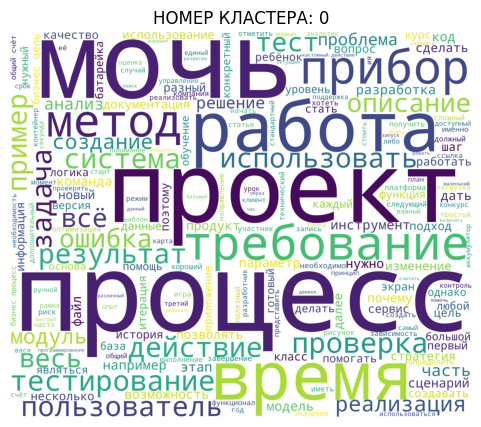

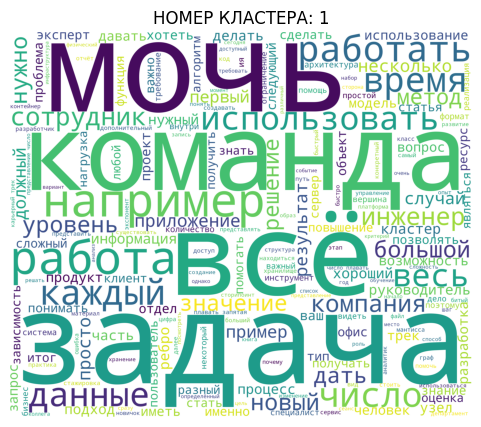

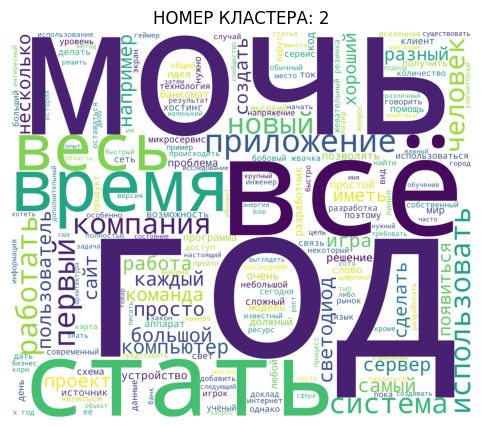

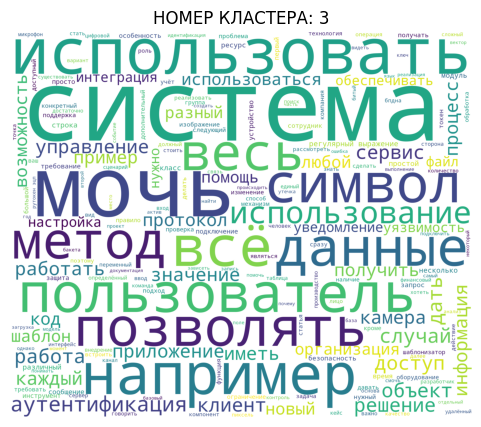

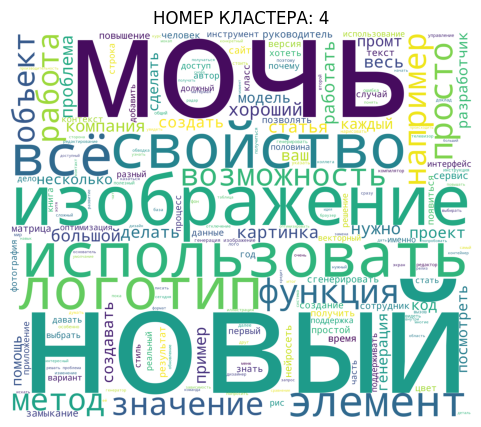

In [44]:
for i in sorted(df['cluster'].unique()):
    corpus = get_corpus(df[df['cluster'] == i].text_lemm.values)
    procWordCloud = get_wordCloud(corpus)
    
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(procWordCloud)
    plt.axis('off')
    plt.title(f'–ù–û–ú–ï–† –ö–õ–ê–°–¢–ï–†–ê: {i}')
    plt.subplot(1, 2, 1)

In [45]:
df_cluster = pd.DataFrame()

In [46]:
df_cluster['name'] = ['–ê–Ω–∞–ª–∏—Ç–∏–∫–∞ –¥–∞–Ω–Ω—ã—Ö', '–£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Å–∏—Å—Ç–µ–º–∞–º–∏', '–¢–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ –∏ —Ä–∞–∑–≤–ª–µ—á–µ–Ω–∏—è', '–ë–∏–æ–º–µ—Ç—Ä–∏—è –∏ –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏—è', '–ü—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ']

In [47]:
df_cluster

name
0           –ê–Ω–∞–ª–∏—Ç–∏–∫–∞ –¥–∞–Ω–Ω—ã—Ö
1       –£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Å–∏—Å—Ç–µ–º–∞–º–∏
2   –¢–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ –∏ —Ä–∞–∑–≤–ª–µ—á–µ–Ω–∏—è
3  –ë–∏–æ–º–µ—Ç—Ä–∏—è –∏ –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏—è
4           –ü—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ

___

## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [49]:
df.head()

title         namecompany  \
0  SSTI –≤ Python –ø–æ–¥ –º–∏–∫—Ä–æ—Å–∫–æ–ø–æ–º: —Ä–∞–∑–±–∏—Ä–∞–µ–º Pytho...             BI.ZONE   
1                –ü—Ä–æ—Ç–∏–≤–æ–≤–∏—Ä—É—Å–Ω–∞—è –∂–µ–≤–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–∑–∏–Ω–∫–∞  ua-hosting.company   
2  Keycloak: –∫–∞–∫ —É–ø—Ä–æ—Å—Ç–∏—Ç—å –∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é –∏ –Ω–µ —Å–æ...           Clevertec   
3  –ò–∑ —á–µ–≥–æ —Å–¥–µ–ª–∞–Ω—ã GPU –æ—Ç –¢1 –û–±–ª–∞–∫–æ? –§–æ—Ç–æ–æ–±–∑–æ—Ä –∏ ...          –•–æ–ª–¥–∏–Ω–≥ –¢1   
4  –§—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –Ω–∞—É–∫–∏ –∏ –ò–¢: —Å–æ–∑–¥–∞–Ω–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞...             –ò–Ω—Ñ–µ—Ä–∏—Ç   

                                        description  rating  \
0                                          –ö–æ–º–ø–∞–Ω–∏—è   76.41   
1     –•–æ—Å—Ç–∏–Ω–≥-–ø—Ä–æ–≤–∞–π–¥–µ—Ä: —Å–µ—Ä–≤–µ—Ä—ã –≤ NL –¥–æ 300 –ì–±–∏—Ç/—Å  169.07   
2  –¶–∏—Ñ—Ä–æ–≤—ã–µ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è –±–∏–∑–Ω–µ—Å–∞ | —Ñ–∏–Ω—Ç–µ—Ö, –ª–æ–≥–∏—Å—Ç–∏–∫–∞   59.14   
3                        –ú–Ω–æ–≥–æ–ø—Ä–æ—Ñ–∏–ª—å–Ω—ã–π –ò–¢-—Ö–æ–ª–¥–∏–Ω–≥  125.41   
4                                          –ö–æ–º–ø–∞–Ω–∏—è  229.82   

                                               field        date  \
0  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –í–µ–±-—Å–µ—Ä–≤–∏—Å—ã, –ò–Ω—Ñ–æ—Ä–º–∞—Ü...  2025-04-09   
1  –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –°–≤—è–∑—å –∏ —Ç–µ–ª–µ–∫–æ–º–º—É–Ω–∏–∫–∞—Ü...  2025-04-09   
2  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ú–æ–±–∏–ª—å–Ω—ã–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏,...  2025-04-09   
3  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏...  2025-04-09   
4    –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ  2025-04-09   

                                             textpub  \
0  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä! –ú–µ–Ω—è –∑–æ–≤—É—Ç –°–µ—Ä–≥–µ–π –ê—Ä–µ—Ñ—å–µ–≤. –Ø —Å–ø–µ...   
1    –ü–∞–Ω–¥–µ–º–∏—è, –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±...   
2  –ü—Ä–∏–≤–µ—Ç! –Ø –î–∏–∞–Ω–∞, —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ Cleverte...   
3  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä. –ù–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ –¢1 –û–±–ª–∞–∫–æ. –ï—Å–ª–∏...   
4  –†–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π ‚Äî –æ—Ç –ø–µ—Ä–≤—ã—Ö...   

                                            text_new  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1   –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ clevertec ...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                      tokenize_texts  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1  –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                           text_stem  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω –∑–æ–≤—É—Ç —Å–µ—Ä–≥ –∞—Ä–µ—Ñ —è —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ...   
1  –ø–∞–Ω–¥–µ–º –ø–æ—Å–ª–µ–¥—Å—Ç–≤ –∫–æ—Ç–æ—Ä –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥–∞ –ø–æ –≤...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞ —Å–∏—Å—Ç–µ–º–Ω –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø–æ–¥–∞–≤...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑ –∫–æ–º–∞–Ω–¥ —Ç –æ–±–ª–∞–∫ –µ—Å–ª –≤—ã —Å–ª–µ–¥...   
4  —Ä–∞–∑–≤–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω —Ç–µ—Ö–Ω–æ–ª–æ–≥ –æ—Ç –ø–µ—Ä–≤ –∞–ª–≥–æ—Ä–∏—Ç–º –¥...   

                                           text_lemm  cluster  
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä–∞ –∑–≤–∞—Ç—å —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ...        3  
1  –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏–

In [50]:
df['namecompany'].unique()

array(['BI.ZONE', 'ua-hosting.company', 'Clevertec', '–•–æ–ª–¥–∏–Ω–≥ –¢1',
       '–ò–Ω—Ñ–µ—Ä–∏—Ç', 'Smart-AV –ú—É–ª—å—Ç–∏–º–µ–¥–∏–∞', 'OTUS', 'RUVDS.com', 'T.Hunter',
       'Raft', 'MWS', 'IT –¥–ª—è –¥–µ—Ç–µ–π', 'Surf', 'Usetech', '–†—É–Ω–∏—Ç–∏',
       'Online patent', 'Selectel', 'SM Lab', '–ú–¢–°', 'Timeweb Cloud',
       '–¢–æ—á–∫–∞', 'Minervasoft', '–ò–∑–¥–∞—Ç–µ–ª—å—Å–∫–∏–π –¥–æ–º ¬´–ü–∏—Ç–µ—Ä¬ª',
       '–ì—Ä—É–ø–ø–∞ –∫–æ–º–ø–∞–Ω–∏–π X-Com', '–ë–∞—Å—Ç–∏–æ–Ω', '–°–±–µ—Ä',
       '–ö–æ–Ω—Ñ–µ—Ä–µ–Ω—Ü–∏–∏ –û–ª–µ–≥–∞ –ë—É–Ω–∏–Ω–∞ (–û–Ω—Ç–∏–∫–æ)', 'FirstVDS', 'SimbirSoft',
       '–î–æ–º–∫–ª–∏–∫', 'Garage Eight', '–ü–ò–ö', 'F6',
       '–ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –±–∞–Ω–∫', '–ù–õ–ú–ö –ò–¢', '–ì–ö –õ–ê–ù–ò–¢', 'Axiom JDK',
       '–ú–æ–π–°–∫–ª–∞–¥', '–Ø–Ω–¥–µ–∫—Å –ü—Ä–∞–∫—Ç–∏–∫—É–º', '–ì–∞–∑–ø—Ä–æ–º–±–∞–Ω–∫', '–ö–æ–Ω—Ç—É—Ä',
       '–≠–∫—Å–ø–µ—Ä—Ç –†–ü',
       '–ò–Ω—Å—Ç–∏—Ç—É—Ç —Å–∏—Å—Ç–µ–º–Ω–æ–≥–æ –ø—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏—è –∏–º. –í.–ü. –ò–≤–∞–Ω–Ω–∏–∫–æ–≤–∞ –†–ê–ù

In [51]:
unique_companies = df['namecompany'].unique()
company_codes = {company: idx + 1 for idx, company in enumerate(unique_companies)}

df['company_code'] = df['namecompany'].map(company_codes)

In [52]:
df.head()

title         namecompany  \
0  SSTI –≤ Python –ø–æ–¥ –º–∏–∫—Ä–æ—Å–∫–æ–ø–æ–º: —Ä–∞–∑–±–∏—Ä–∞–µ–º Pytho...             BI.ZONE   
1                –ü—Ä–æ—Ç–∏–≤–æ–≤–∏—Ä—É—Å–Ω–∞—è –∂–µ–≤–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–∑–∏–Ω–∫–∞  ua-hosting.company   
2  Keycloak: –∫–∞–∫ —É–ø—Ä–æ—Å—Ç–∏—Ç—å –∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é –∏ –Ω–µ —Å–æ...           Clevertec   
3  –ò–∑ —á–µ–≥–æ —Å–¥–µ–ª–∞–Ω—ã GPU –æ—Ç –¢1 –û–±–ª–∞–∫–æ? –§–æ—Ç–æ–æ–±–∑–æ—Ä –∏ ...          –•–æ–ª–¥–∏–Ω–≥ –¢1   
4  –§—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –Ω–∞—É–∫–∏ –∏ –ò–¢: —Å–æ–∑–¥–∞–Ω–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞...             –ò–Ω—Ñ–µ—Ä–∏—Ç   

                                        description  rating  \
0                                          –ö–æ–º–ø–∞–Ω–∏—è   76.41   
1     –•–æ—Å—Ç–∏–Ω–≥-–ø—Ä–æ–≤–∞–π–¥–µ—Ä: —Å–µ—Ä–≤–µ—Ä—ã –≤ NL –¥–æ 300 –ì–±–∏—Ç/—Å  169.07   
2  –¶–∏—Ñ—Ä–æ–≤—ã–µ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è –±–∏–∑–Ω–µ—Å–∞ | —Ñ–∏–Ω—Ç–µ—Ö, –ª–æ–≥–∏—Å—Ç–∏–∫–∞   59.14   
3                        –ú–Ω–æ–≥–æ–ø—Ä–æ—Ñ–∏–ª—å–Ω—ã–π –ò–¢-—Ö–æ–ª–¥–∏–Ω–≥  125.41   
4                                          –ö–æ–º–ø–∞–Ω–∏—è  229.82   

                                               field        date  \
0  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –í–µ–±-—Å–µ—Ä–≤–∏—Å—ã, –ò–Ω—Ñ–æ—Ä–º–∞—Ü...  2025-04-09   
1  –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –°–≤—è–∑—å –∏ —Ç–µ–ª–µ–∫–æ–º–º—É–Ω–∏–∫–∞—Ü...  2025-04-09   
2  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ú–æ–±–∏–ª—å–Ω—ã–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏,...  2025-04-09   
3  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏...  2025-04-09   
4    –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ  2025-04-09   

                                             textpub  \
0  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä! –ú–µ–Ω—è –∑–æ–≤—É—Ç –°–µ—Ä–≥–µ–π –ê—Ä–µ—Ñ—å–µ–≤. –Ø —Å–ø–µ...   
1    –ü–∞–Ω–¥–µ–º–∏—è, –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±...   
2  –ü—Ä–∏–≤–µ—Ç! –Ø –î–∏–∞–Ω–∞, —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ Cleverte...   
3  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä. –ù–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ –¢1 –û–±–ª–∞–∫–æ. –ï—Å–ª–∏...   
4  –†–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π ‚Äî –æ—Ç –ø–µ—Ä–≤—ã—Ö...   

                                            text_new  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1   –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ clevertec ...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                      tokenize_texts  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1  –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                           text_stem  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω –∑–æ–≤—É—Ç —Å–µ—Ä–≥ –∞—Ä–µ—Ñ —è —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ...   
1  –ø–∞–Ω–¥–µ–º –ø–æ—Å–ª–µ–¥—Å—Ç–≤ –∫–æ—Ç–æ—Ä –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥–∞ –ø–æ –≤...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞ —Å–∏—Å—Ç–µ–º–Ω –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø–æ–¥–∞–≤...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑ –∫–æ–º–∞–Ω–¥ —Ç –æ–±–ª–∞–∫ –µ—Å–ª –≤—ã —Å–ª–µ–¥...   
4  —Ä–∞–∑–≤–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω —Ç–µ—Ö–Ω–æ–ª–æ–≥ –æ—Ç –ø–µ—Ä–≤ –∞–ª–≥–æ—Ä–∏—Ç–º –¥...   

                                           text_lemm  cluster  company_code  
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä–∞ –∑–≤–∞—Ç—å —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ...        3             1  
1  –ø–∞–Ω–¥–µ

In [53]:
# –î–æ–±–∞–≤–ª—è–µ–º –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã, –æ—Å–Ω–æ–≤—ã–≤–∞—è—Å—å –Ω–∞ —Ç–µ–∫—Å—Ç–µ, —á—Ç–æ–±—ã –º–æ–¥–µ–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ª—É—á—à–µ –æ–±—É—á–∏–ª–∏—Å—å

df['text_length'] = df['text_lemm'].str.len() # –æ–±—â. –∫–æ–ª-–≤–æ —Å–∏–º–≤–æ–ª–æ–≤
df['word_count'] = df['text_lemm'].str.split().str.len() #–∫–æ–ª-–≤–æ —Å–ª–æ–≤
df['company_article_count'] = df.groupby('namecompany')['namecompany'].transform('count') # –∫–æ–ª-–≤–æ —Å—Ç–∞—Ç–µ–π –æ—Ç –æ–¥–Ω–æ–π –∫–æ–º–ø–∞–Ω–∏–∏
df['cluster_size'] = df.groupby('cluster')['cluster'].transform('count') #  –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞—Ç–µ–π –≤ –∫–ª–∞—Å—Ç–µ—Ä–µ

In [54]:
df.head()

title         namecompany  \
0  SSTI –≤ Python –ø–æ–¥ –º–∏–∫—Ä–æ—Å–∫–æ–ø–æ–º: —Ä–∞–∑–±–∏—Ä–∞–µ–º Pytho...             BI.ZONE   
1                –ü—Ä–æ—Ç–∏–≤–æ–≤–∏—Ä—É—Å–Ω–∞—è –∂–µ–≤–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–∑–∏–Ω–∫–∞  ua-hosting.company   
2  Keycloak: –∫–∞–∫ —É–ø—Ä–æ—Å—Ç–∏—Ç—å –∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é –∏ –Ω–µ —Å–æ...           Clevertec   
3  –ò–∑ —á–µ–≥–æ —Å–¥–µ–ª–∞–Ω—ã GPU –æ—Ç –¢1 –û–±–ª–∞–∫–æ? –§–æ—Ç–æ–æ–±–∑–æ—Ä –∏ ...          –•–æ–ª–¥–∏–Ω–≥ –¢1   
4  –§—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –Ω–∞—É–∫–∏ –∏ –ò–¢: —Å–æ–∑–¥–∞–Ω–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞...             –ò–Ω—Ñ–µ—Ä–∏—Ç   

                                        description  rating  \
0                                          –ö–æ–º–ø–∞–Ω–∏—è   76.41   
1     –•–æ—Å—Ç–∏–Ω–≥-–ø—Ä–æ–≤–∞–π–¥–µ—Ä: —Å–µ—Ä–≤–µ—Ä—ã –≤ NL –¥–æ 300 –ì–±–∏—Ç/—Å  169.07   
2  –¶–∏—Ñ—Ä–æ–≤—ã–µ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è –±–∏–∑–Ω–µ—Å–∞ | —Ñ–∏–Ω—Ç–µ—Ö, –ª–æ–≥–∏—Å—Ç–∏–∫–∞   59.14   
3                        –ú–Ω–æ–≥–æ–ø—Ä–æ—Ñ–∏–ª—å–Ω—ã–π –ò–¢-—Ö–æ–ª–¥–∏–Ω–≥  125.41   
4                                          –ö–æ–º–ø–∞–Ω–∏—è  229.82   

                                               field        date  \
0  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –í–µ–±-—Å–µ—Ä–≤–∏—Å—ã, –ò–Ω—Ñ–æ—Ä–º–∞—Ü...  2025-04-09   
1  –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –°–≤—è–∑—å –∏ —Ç–µ–ª–µ–∫–æ–º–º—É–Ω–∏–∫–∞—Ü...  2025-04-09   
2  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ú–æ–±–∏–ª—å–Ω—ã–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏,...  2025-04-09   
3  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏...  2025-04-09   
4    –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ  2025-04-09   

                                             textpub  \
0  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä! –ú–µ–Ω—è –∑–æ–≤—É—Ç –°–µ—Ä–≥–µ–π –ê—Ä–µ—Ñ—å–µ–≤. –Ø —Å–ø–µ...   
1    –ü–∞–Ω–¥–µ–º–∏—è, –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±...   
2  –ü—Ä–∏–≤–µ—Ç! –Ø –î–∏–∞–Ω–∞, —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ Cleverte...   
3  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä. –ù–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ –¢1 –û–±–ª–∞–∫–æ. –ï—Å–ª–∏...   
4  –†–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π ‚Äî –æ—Ç –ø–µ—Ä–≤—ã—Ö...   

                                            text_new  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1   –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ clevertec ...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                      tokenize_texts  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1  –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                           text_stem  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω –∑–æ–≤—É—Ç —Å–µ—Ä–≥ –∞—Ä–µ—Ñ —è —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ...   
1  –ø–∞–Ω–¥–µ–º –ø–æ—Å–ª–µ–¥—Å—Ç–≤ –∫–æ—Ç–æ—Ä –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥–∞ –ø–æ –≤...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞ —Å–∏—Å—Ç–µ–º–Ω –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø–æ–¥–∞–≤...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑ –∫–æ–º–∞–Ω–¥ —Ç –æ–±–ª–∞–∫ –µ—Å–ª –≤—ã —Å–ª–µ–¥...   
4  —Ä–∞–∑–≤–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω —Ç–µ—Ö–Ω–æ–ª–æ–≥ –æ—Ç –ø–µ—Ä–≤ –∞–ª–≥–æ—Ä–∏—Ç–º –¥...   

                                           text_lemm  cluster  company_code  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä–∞ –∑–≤–∞—Ç—å —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ...        3             1   
1  –ø–∞–Ω–¥

In [55]:
X = df.drop(columns=["title", 'namecompany', 'description', 'field', 'date', 'textpub',	'text_new',	'tokenize_texts', 'text_stem',	'text_lemm',	'cluster'])  # –ü—Ä–∏–∑–Ω–∞–∫–∏
y = df['cluster']  # –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (–º–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤)

In [56]:
X.head()

rating  company_code  text_length  word_count  company_article_count  \
0   76.41             1        13376        1510                      2   
1  169.07             2        19645        2187                      1   
2   59.14             3         9839        1087                      1   
3  125.41             4         6076         670                      2   
4  229.82             5         6131         686                      1   

   cluster_size  
0            17  
1            24  
2            17  
3            23  
4            23

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
# –°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # –ú–µ—Ç—Ä–∏–∫–∏
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # –ò—Ç–æ–≥–∏
    print(classification_report(y_test, y_pred))
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

In [60]:
# –ú–æ–¥–µ–ª–∏ –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=200, max_depth=7)
}

In [61]:
# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–µ–π
results = {}
for name, model in models.items():
    print(f"{name}")
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

Logistic Regression
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       1.00      0.45      0.62        11
           2       0.40      1.00      0.57         4
           3       1.00      0.40      0.57         5
           4       0.80      0.80      0.80         5

    accuracy                           0.63        30
   macro avg       0.74      0.69      0.64        30
weighted avg       0.80      0.63      0.64        30

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00

In [62]:
# –°–æ–∑–¥–∞–Ω–∏–µ —Ç–∞–±–ª–∏—Ü—ã –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π
results_df = pd.DataFrame(results).T
print("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:")
print(results_df)

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.633333   0.803333  0.633333  0.636493
Decision Tree        1.000000   1.000000  1.000000  1.000000
Random Forest        0.900000   0.902778  0.900000  0.898990


##### –õ—É—á—à–µ –≤—Å–µ–≥–æ —Å–µ–±—è –ø–æ–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å Decision Tree. –ù–æ —Ç.–∫. —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ–º, –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å **RandomForest**

___

## –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

In [63]:
import gensim 
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [64]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

In [65]:
df['lemm_tokenize'] = [tokenize2(text) for text in df['text_lemm']]

In [66]:
df.head()

title         namecompany  \
0  SSTI –≤ Python –ø–æ–¥ –º–∏–∫—Ä–æ—Å–∫–æ–ø–æ–º: —Ä–∞–∑–±–∏—Ä–∞–µ–º Pytho...             BI.ZONE   
1                –ü—Ä–æ—Ç–∏–≤–æ–≤–∏—Ä—É—Å–Ω–∞—è –∂–µ–≤–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–∑–∏–Ω–∫–∞  ua-hosting.company   
2  Keycloak: –∫–∞–∫ —É–ø—Ä–æ—Å—Ç–∏—Ç—å –∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—é –∏ –Ω–µ —Å–æ...           Clevertec   
3  –ò–∑ —á–µ–≥–æ —Å–¥–µ–ª–∞–Ω—ã GPU –æ—Ç –¢1 –û–±–ª–∞–∫–æ? –§–æ—Ç–æ–æ–±–∑–æ—Ä –∏ ...          –•–æ–ª–¥–∏–Ω–≥ –¢1   
4  –§—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –Ω–∞—É–∫–∏ –∏ –ò–¢: —Å–æ–∑–¥–∞–Ω–∏–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞...             –ò–Ω—Ñ–µ—Ä–∏—Ç   

                                        description  rating  \
0                                          –ö–æ–º–ø–∞–Ω–∏—è   76.41   
1     –•–æ—Å—Ç–∏–Ω–≥-–ø—Ä–æ–≤–∞–π–¥–µ—Ä: —Å–µ—Ä–≤–µ—Ä—ã –≤ NL –¥–æ 300 –ì–±–∏—Ç/—Å  169.07   
2  –¶–∏—Ñ—Ä–æ–≤—ã–µ —Ä–µ—à–µ–Ω–∏—è –¥–ª—è –±–∏–∑–Ω–µ—Å–∞ | —Ñ–∏–Ω—Ç–µ—Ö, –ª–æ–≥–∏—Å—Ç–∏–∫–∞   59.14   
3                        –ú–Ω–æ–≥–æ–ø—Ä–æ—Ñ–∏–ª—å–Ω—ã–π –ò–¢-—Ö–æ–ª–¥–∏–Ω–≥  125.41   
4                                          –ö–æ–º–ø–∞–Ω–∏—è  229.82   

                                               field        date  \
0  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –í–µ–±-—Å–µ—Ä–≤–∏—Å—ã, –ò–Ω—Ñ–æ—Ä–º–∞—Ü...  2025-04-09   
1  –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –°–≤—è–∑—å –∏ —Ç–µ–ª–µ–∫–æ–º–º—É–Ω–∏–∫–∞—Ü...  2025-04-09   
2  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ú–æ–±–∏–ª—å–Ω—ã–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏,...  2025-04-09   
3  –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏...  2025-04-09   
4    –ü—Ä–æ–≥—Ä–∞–º–º–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ, –ê–ø–ø–∞—Ä–∞—Ç–Ω–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ  2025-04-09   

                                             textpub  \
0  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä! –ú–µ–Ω—è –∑–æ–≤—É—Ç –°–µ—Ä–≥–µ–π –ê—Ä–µ—Ñ—å–µ–≤. –Ø —Å–ø–µ...   
1    –ü–∞–Ω–¥–µ–º–∏—è, –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±...   
2  –ü—Ä–∏–≤–µ—Ç! –Ø –î–∏–∞–Ω–∞, —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ Cleverte...   
3  –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä. –ù–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ –¢1 –û–±–ª–∞–∫–æ. –ï—Å–ª–∏...   
4  –†–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π ‚Äî –æ—Ç –ø–µ—Ä–≤—ã—Ö...   

                                            text_new  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1   –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ clevertec ...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                      tokenize_texts  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω—è –∑–æ–≤—É—Ç —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —è —Å–ø–µ—Ü–∏–∞...   
1  –ø–∞–Ω–¥–µ–º–∏—è –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞–Ω–∞ —Å–∏—Å—Ç–µ–º–Ω—ã–π –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ —Ç –æ–±–ª–∞–∫–æ –µ—Å–ª–∏ –≤—ã ...   
4  —Ä–∞–∑–≤–∏—Ç–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π –æ—Ç –ø–µ—Ä–≤—ã—Ö –∞...   

                                           text_stem  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –º–µ–Ω –∑–æ–≤—É—Ç —Å–µ—Ä–≥ –∞—Ä–µ—Ñ —è —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ...   
1  –ø–∞–Ω–¥–µ–º –ø–æ—Å–ª–µ–¥—Å—Ç–≤ –∫–æ—Ç–æ—Ä –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥–∞ –ø–æ –≤...   
2  –ø—Ä–∏–≤–µ—Ç —è –¥–∏–∞ —Å–∏—Å—Ç–µ–º–Ω –∞–Ω–∞–ª–∏—Ç–∏–∫ –≤ –∏ —ç–∫—Å –ø—Ä–µ–ø–æ–¥–∞–≤...   
3  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä –Ω–∞ —Å–≤—è–∑ –∫–æ–º–∞–Ω–¥ —Ç –æ–±–ª–∞–∫ –µ—Å–ª –≤—ã —Å–ª–µ–¥...   
4  —Ä–∞–∑–≤–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω —Ç–µ—Ö–Ω–æ–ª–æ–≥ –æ—Ç –ø–µ—Ä–≤ –∞–ª–≥–æ—Ä–∏—Ç–º –¥...   

                                           text_lemm  cluster  company_code  \
0  –ø—Ä–∏–≤–µ—Ç —Ö–∞–±—Ä–∞ –∑–≤–∞—Ç—å —Å–µ—Ä–≥–µ–π –∞—Ä–µ—Ñ—å–µ–≤ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ...        3             1   
1  –ø–∞–Ω–¥

In [67]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–π –≤—ã—è–≤–ª—è–µ—Ç —Å–∫—Ä—ã—Ç—ã–µ —Ç–µ–º—ã
def lda5_model(df):
    gensim_dictionary = gensim.corpora.Dictionary(df['lemm_tokenize']) # –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º —Ç–æ–∫–µ–Ω—ã –≤ —Å–ª–æ–≤–∞—Ä—å

    corpus = [gensim_dictionary.doc2bow(text) for text in df['lemm_tokenize']] # –ø–æ–ª—É—á–∞–µ–º –∫–æ—Ä—Ç–µ–∂ "–º–µ—à–∫–∞ —Å–ª–æ–≤"

    lda_5 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

    for tpl in lda_5.print_topics():
        print(tpl, end='\n\n')
    print()
    
    vis_5 = gensimvis.prepare(lda_5, corpus, gensim_dictionary)
    pyLDAvis.enable_notebook()
    display(pyLDAvis.display(vis_5))

In [68]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ —Å–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–π –≤—ã—è–≤–ª—è–µ—Ç —Å–∫—Ä—ã—Ç—ã–µ —Ç–µ–º—ã
from sklearn.decomposition import TruncatedSVD

def lsa5_model(df):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))
    
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])
    
    lsa_model = TruncatedSVD(n_components=5, random_state=0)
    lsa_model.fit(tfidf_matrix)
    
    for i, topic in enumerate(lsa_model.components_):
        print(f"–¢–µ–º–∞ –Ω–æ–º–µ—Ä {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

In [69]:
print('LDA –º–æ–¥–µ–ª—å\n' + '_' * 100)
for cluster in sorted(df['cluster'].unique()):
    new_df = df[df['cluster'] == cluster]
    print(f'–ö–õ–ê–°–¢–ï–†: {cluster}\n')
    lda5_model(new_df)
    print('_' * 100)

LDA –º–æ–¥–µ–ª—å
____________________________________________________________________________________________________
–ö–õ–ê–°–¢–ï–†: 0

(0, '0.017*"–¥–µ–π—Å—Ç–≤–∏–µ" + 0.014*"–ø—Ä–æ—Ü–µ—Å—Å" + 0.009*"–ø—Ä–æ–≤–µ—Ä–∫–∞" + 0.007*"–º–µ—Ç–æ–¥" + 0.006*"–∑–∞–¥–∞—á–∞" + 0.006*"—Ä–µ—à–µ–Ω–∏–µ" + 0.006*"—Ä–µ–∑—É–ª—å—Ç–∞—Ç" + 0.005*"–∫–ª–∞—Å—Å" + 0.005*"–º–æ—á—å" + 0.005*"–æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è"')

(1, '0.012*"‚Äì" + 0.009*"—Ä–∞–±–æ—Ç–∞" + 0.009*"–ø—Ä–æ—Ü–µ—Å—Å" + 0.008*"–∏—è" + 0.008*"—Ä–∏—Å—É–Ω–æ–∫" + 0.007*"–¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—è" + 0.007*"–∞–Ω–∞–ª–∏–∑" + 0.007*"—Å—Ü–µ–Ω–∞—Ä–∏–π" + 0.006*"–æ–ø–∏—Å–∞–Ω–∏–µ" + 0.006*"–º–æ—á—å"')

(2, '0.013*"–ø—Ä–æ–µ–∫—Ç" + 0.012*"–º–æ—á—å" + 0.011*"—Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ" + 0.010*"–ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å" + 0.009*"—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ" + 0.008*"–±–∏–∑–Ω–µ—Å" + 0.008*"—Ü–µ–ª—å" + 0.008*"—Å—Ç—Ä–∞—Ç–µ–≥–∏—è" + 0.007*"—Å—á—ë—Ç" + 0.006*"–ø—Ä–æ—Ü–µ—Å—Å"')

(3, '0.025*"–ø—Ä–∏–±–æ—Ä" + 0.023*"—Ç–µ—Å—Ç" + 0.013*"–Ω–∞–ø—Ä—è–∂–µ–Ω–∏–µ" + 0.012*"–º–æ–¥—É–ª—å" + 0.0

____________________________________________________________________________________________________
–ö–õ–ê–°–¢–ï–†: 1

(0, '0.008*"–∑–∞–¥–∞—á–∞" + 0.008*"–º–æ—á—å" + 0.006*"–¥–∞–Ω–Ω—ã–µ" + 0.006*"—Ç—Ä–µ–Ω–∏—Ä–æ–≤–∫–∞" + 0.005*"—Å–µ–∞–Ω—Å" + 0.005*"–º–µ—Ç–æ–¥" + 0.005*"–º–æ–¥–µ–ª—å" + 0.005*"–æ—Ü–µ–Ω–∫–∞" + 0.004*"–∫–æ–º–∞–Ω–¥–∞" + 0.004*"—Å—Ç–æ—Ä–∏–ø–æ–∏–Ω—Ç"')

(1, '0.009*"–∑–∞–¥–∞—á–∞" + 0.008*"–∫–æ–º–∞–Ω–¥–∞" + 0.007*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.007*"–∏–Ω–∂–µ–Ω–µ—Ä" + 0.007*"–∫–æ–º–ø–∞–Ω–∏—è" + 0.007*"—Ç—Ä–µ–∫" + 0.007*"–∫–ª–∞—Å—Ç–µ—Ä" + 0.007*"–º–æ—á—å" + 0.006*"–Ω–∞–ø—Ä–∏–º–µ—Ä" + 0.006*"—Ä–∞–±–æ—Ç–∞"')

(2, '0.009*"–∑–∞–¥–∞—á–∞" + 0.008*"–∞–Ω–∞–ª–∏—Ç–∏–∫" + 0.007*"—Ä–∞–±–æ—Ç–∞—Ç—å" + 0.007*"–∏—è" + 0.006*"–º–æ—á—å" + 0.006*"–≤—Å—ë" + 0.005*"—Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ" + 0.005*"—Å–∏—Å—Ç–µ–º–Ω—ã–π" + 0.004*"—Ä–∞–±–æ—Ç–∞" + 0.004*"—Å—Ç—Ä—É–∫—Ç—É—Ä–∞"')

(3, '0.026*"—É–∑–µ–ª" + 0.025*"–≥—Ä–∞—Ñ" + 0.014*"—Ä–µ–±—Ä–æ" + 0.013*"‚Üí" + 0.012*"–∑–∞–¥–∞—á–∞" + 0.010*"–≤–µ—Ä—à–∏–Ω–∞" + 0.010*"–≤—Ä–µ–

____________________________________________________________________________________________________
–ö–õ–ê–°–¢–ï–†: 2

(0, '0.009*"–∑–∞–∫–æ–Ω" + 0.008*"–≥–æ–¥" + 0.005*"–º–æ—á—å" + 0.005*"–¥–æ–∫–ª–∞–¥" + 0.005*"—á–µ–ª–æ–≤–µ–∫" + 0.004*"–≤—Å—ë" + 0.004*"–∫–æ—Ä–º" + 0.004*"—Ö–æ—Ä–æ—à–∏–π" + 0.004*"–∑–æ–æ–º–∞–≥–∞–∑–∏–Ω" + 0.004*"–≤–µ—Å—å"')

(1, '0.010*"–≤–∏—Ä—É—Å" + 0.008*"–∂–≤–∞—á–∫–∞" + 0.008*"–±–æ–±–æ–≤—ã–π" + 0.006*"–º–≥" + 0.006*"–∂–µ–≤–∞—Ç–µ–ª—å–Ω—ã–π" + 0.006*"—Ä–µ–∑–∏–Ω–∫–∞" + 0.005*"–≥–æ–¥" + 0.005*"–º–æ—á—å" + 0.004*"–¥–µ–Ω—å" + 0.004*"–≤—Å—ë"')

(2, '0.011*"–≥–æ–¥" + 0.011*"–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ" + 0.007*"—Å–µ—Ä–≤–µ—Ä" + 0.007*"–±–∞–Ω–∫–æ–º–∞—Ç" + 0.006*"—Å–∞–π—Ç" + 0.006*"–ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å" + 0.006*"–∫–∞—Ä—Ç–∞" + 0.006*"—Ö–æ—Å—Ç–∏–Ω–≥" + 0.005*"–∫–æ–º–ø—å—é—Ç–µ—Ä" + 0.005*"–≤–µ–±"')

(3, '0.009*"–≥–æ–¥" + 0.005*"–º–æ—á—å" + 0.005*"–∏–≥—Ä–∞" + 0.005*"–∞–ø–ø–∞—Ä–∞—Ç" + 0.004*"–≤–µ—Å—å" + 0.004*"–≤—Ä–µ–º—è" + 0.004*"—Å—Ö–µ–º–∞" + 0.003*"—Å—Ç–∞—Ç—å" + 0.003*"–º–∏–∫—Ä–æ—Å–µ

____________________________________________________________________________________________________
–ö–õ–ê–°–¢–ï–†: 3

(0, '0.013*"—Å–∏—Å—Ç–µ–º–∞" + 0.012*"—Å–∏–º–≤–æ–ª" + 0.009*"–º–æ—á—å" + 0.008*"–¥–∞–Ω–Ω—ã–µ" + 0.007*"–Ω–∞–ø—Ä–∏–º–µ—Ä" + 0.007*"–º–µ—Ç–æ–¥" + 0.007*"–≤—Å—ë" + 0.006*"–∑–Ω–∞—á–µ–Ω–∏–µ" + 0.006*"–æ–±—ä–µ–∫—Ç" + 0.006*"–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å"')

(1, '0.015*"–∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è" + 0.013*"–±–ø–¥–Ω–∞" + 0.012*"—Å—É–±—ä–µ–∫—Ç" + 0.012*"–±–∏–æ–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–π" + 0.010*"—Å–∏—Å—Ç–µ–º–∞" + 0.010*"–µ–±—Å" + 0.009*"—à–∞–±–ª–æ–Ω" + 0.009*"üü£" + 0.008*"—Å–∫—É–¥–∞" + 0.008*"–º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–π"')

(2, '0.013*"—Å–∏—Å—Ç–µ–º–∞" + 0.012*"–∞—É—Ç–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏—è" + 0.009*"–ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å" + 0.008*"–∫–∞–º–µ—Ä–∞" + 0.007*"–º–æ—á—å" + 0.007*"–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å" + 0.007*"‚Äì" + 0.006*"–¥–æ—Å—Ç—É–ø" + 0.006*"—Å–µ—Ä–≤–∏—Å" + 0.005*"–ø–æ–∑–≤–æ–ª—è—Ç—å"')

(3, '0.021*"—Å–∏—Å—Ç–µ–º–∞" + 0.016*"–∏—Ç" + 0.013*"—É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ" + 0.013*"–∞–∫—Ç–∏–≤" 

____________________________________________________________________________________________________
–ö–õ–ê–°–¢–ï–†: 4

(0, '0.028*"—Å–≤–æ–π—Å—Ç–≤–æ" + 0.017*"—ç–ª–µ–º–µ–Ω—Ç" + 0.017*"–∑–Ω–∞—á–µ–Ω–∏–µ" + 0.011*"–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å" + 0.008*"—Å–∏–Ω—Ç–∞–∫—Å–∏—Å" + 0.008*"‚Äú" + 0.008*"‚Äù" + 0.006*"–º–æ—á—å" + 0.006*"–∑–Ω–∞—Ç—å" + 0.006*"–º–µ–¥–∏–∞"')

(1, '0.019*"–∑–∞–º—ã–∫–∞–Ω–∏–µ" + 0.014*"–º–µ—Ç–æ–¥" + 0.012*"–¥–æ—Å—Ç—É–ø" + 0.011*"–ø—Ä–∏–≤–∞—Ç–Ω—ã–π" + 0.010*"–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å" + 0.010*"–∫–ª–∞—Å—Å" + 0.007*"–æ–±—ä–µ–∫—Ç" + 0.007*"—Å–æ–∑–¥–∞–≤–∞—Ç—å" + 0.007*"–∫–æ–Ω—Ç–µ–∫—Å—Ç" + 0.006*"–Ω–æ–≤—ã–π"')

(2, '0.010*"–º–æ—á—å" + 0.008*"–∫–æ–º–ø–∞–Ω–∏—è" + 0.008*"—Ä—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å" + 0.008*"–º–∞—Ç—Ä–∏—Ü–∞" + 0.007*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.007*"–ø–æ–≤—ã—à–µ–Ω–∏–µ" + 0.006*"—Ä–∞–±–æ—Ç–∞" + 0.006*"–Ω–æ–≤—ã–π" + 0.006*"–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ" + 0.006*"—Ä–∏—Å"')

(3, '0.020*"–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ" + 0.009*"–Ω–æ–≤—ã–π" + 0.008*"–≥–µ–Ω–µ—Ä–∞—Ü–∏—è" + 0.007*"–≤–æ–∑–º–æ–∂–Ω–æ—Å—

____________________________________________________________________________________________________


In [70]:
print('LSA Model\n' + '_' * 100)
for cluster in sorted(df['cluster'].unique()):
    new_df = df[df['cluster'] == cluster]
    print(f'–ö–ª–∞—Å—Ç–µ—Ä: {cluster}\n')
    lsa5_model(new_df)
    print('_' * 100)

LSA Model
____________________________________________________________________________________________________
–ö–ª–∞—Å—Ç–µ—Ä: 0

–¢–µ–º–∞ –Ω–æ–º–µ—Ä 0: –∏–≥—Ä–∞, –ø—Ä–æ–≤–µ—Ä–∫–∞, –ø—Ä–æ–µ–∫—Ç, –ø—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ, —Ä–µ–±—ë–Ω–æ–∫, –¥–µ–π—Å—Ç–≤–∏–µ, —Å—Ç—Ä–∞—Ç–µ–≥–∏—è, –∫—É—Ä—Å, —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ, –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å
–¢–µ–º–∞ –Ω–æ–º–µ—Ä 1: –∏–≥—Ä–∞, —Ä–µ–±—ë–Ω–æ–∫, –ø—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ, –∫—É—Ä—Å, —Ä–æ–±–ª–æ–∫—Å, —É–¥–∞—Ç—å—Å—è, –¥–≤–∏–∂–æ–∫, –∏–≥—Ä–∞ —Ä–æ–±–ª–æ–∫—Å, —à–∫–æ–ª—å–Ω–∏–∫, —Å—Å—ã–ª–∫–∞
–¢–µ–º–∞ –Ω–æ–º–µ—Ä 2: –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è, –±–∏–∑–Ω–µ—Å, —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ, –ø—Ä–æ–µ–∫—Ç, –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å, —Å—á—ë—Ç, —Ä–µ—à–µ–Ω–∏–µ, –∫–æ–Ω–∫—É—Ä—Å, —Ç–æ—á–∫–∞, —ç—Ç–∞–ø
–¢–µ–º–∞ –Ω–æ–º–µ—Ä 3: –ø—Ä–∏–±–æ—Ä, —Ç–µ—Å—Ç, —Å—Ç—Ä–∞—Ç–µ–≥–∏—è, —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ, –Ω–∞–ø—Ä—è–∂–µ–Ω–∏–µ, —Ç–æ–∫, –±–∞—Ç–∞—Ä–µ–π–∫–∞, —à—É–Ω—Ç, –∫–Ω–æ–ø–∫–∞, –∏–∑–º–µ—Ä–µ–Ω–∏–µ
–¢–µ–º–∞ –Ω–æ–º–µ—Ä 4: –≤–∞—Å—è, –ø–æ—á–µ–º—É, –¥–µ–π—Å—Ç–≤–∏–µ, –∫–∏—Ä–∏–ª–ª, —Å—Ç—Ä–∞—Ç

____

## –í—ã–≤–æ–¥ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ

In [71]:
df_cluster.head()

name
0           –ê–Ω–∞–ª–∏—Ç–∏–∫–∞ –¥–∞–Ω–Ω—ã—Ö
1       –£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Å–∏—Å—Ç–µ–º–∞–º–∏
2   –¢–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ –∏ —Ä–∞–∑–≤–ª–µ—á–µ–Ω–∏—è
3  –ë–∏–æ–º–µ—Ç—Ä–∏—è –∏ –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏—è
4           –ü—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ

#### –ö–ª–∞—Å—Ç–µ—Ä 0 (–ê–Ω–∞–ª–∏—Ç–∏–∫–∞ –¥–∞–Ω–Ω—ã—Ö)

In [72]:
cluster_0_articles = df[df['cluster'] == 0][['title', 'textpub']].head()

for idx, row in cluster_0_articles.iterrows():
    print(f"Title: {row['title']}\n")
    print(f"Text: {row['textpub']}\n")
    print("_" * 30 + "\n")

Title: –ß–µ–º –ø–æ–ª–µ–∑–Ω—ã –∫—É—Ä—Å—ã –ø—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏—è –¥–ª—è —à–∫–æ–ª—å–Ω–∏–∫–æ–≤ 6-–≥–æ –∫–ª–∞—Å—Å–∞? –ß—Ç–æ –º–æ–≥—É—Ç —Å–¥–µ–ª–∞—Ç—å –¥–µ—Ç–∏ –≤ 12 –ª–µ—Ç + –ø–æ–¥–±–æ—Ä–∫–∞ –æ–Ω–ª–∞–π–Ω-—É—Ä–æ–∫–æ–≤

Text: –ü—Ä–∏–≤–µ—Ç! –ù–∞ —Å–≤—è–∑–∏ –ö—Å—é—à–∞ ‚Äì –∞–≤—Ç–æ—Ä –≤ –±–ª–æ–≥–µ ¬´IT –¥–ª—è –¥–µ—Ç–µ–π¬ª. –ü–∏—à—É –¥–ª—è —Ä–æ–¥–∏—Ç–µ–ª–µ–π —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —à–∫–æ–ª—å–Ω–∏–∫–æ–≤, —Ä–∞—Å—Å–∫–∞–∑—ã–≤–∞—é –æ —à–∫–æ–ª–∞—Ö –∏ –∫—É—Ä—Å–∞—Ö, –∞ —Ç–∞–∫–∂–µ –æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è—Ö, –ø–æ–ª–µ–∑–Ω—ã—Ö —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –¥–µ—Ç—Å–∫–æ–≥–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤ –∞–π—Ç–∏.–°–µ–≥–æ–¥–Ω—è –ø—Ä–µ–¥–ª–∞–≥–∞—é –ø–æ–≥–æ–≤–æ—Ä–∏—Ç—å –æ–± —É—Ä–æ–∫–∞—Ö –ø—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏—è –¥–ª—è 6-–∫–ª–∞—Å—Å–Ω–∏–∫–æ–≤, –æ–±–æ–∑–Ω–∞—á–∏—Ç—å –∞—Å–ø–µ–∫—Ç –ø–æ–ª—å–∑—ã –∑–∞–Ω—è—Ç–∏–π. –¢–∞–∫–∂–µ –ø–æ–ø—ã—Ç–∞—é—Å—å –æ–±–æ—Å–Ω–æ–≤–∞—Ç—å, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –Ω–∞—á–∏–Ω–∞–Ω–∏—è –≤–ø–æ–ª–Ω–µ —Ä–µ–∞–ª–∏–∑—É–µ–º—ã, –ø—Ä–∏ —ç—Ç–æ–º –±—É–¥—É—Ç —Å—Å—ã–ª–∞—Ç—å—Å—è –Ω–∞ –∏—Å—

–í—Å–µ —Å—Ç–∞—Ç—å–∏ –ø–æ–¥—Ö–æ–¥—è—Ç –ø–æ–¥ —Ç–µ–º–∞—Ç–∏–∫—É –∫–ª–∞—Å—Ç–µ—Ä–∞, —Ç.–∫ –æ–Ω–∏ –≤ –≤ —Ç–æ–π –∏–ª–∏ –∏–Ω–æ–π —Ñ–æ—Ä–º–µ —Å–≤—è–∑–∞–Ω—ã —Å –∞–Ω–∞–ª–∏—Ç–∏–∫–æ–π (—É–ø–æ–º–∏–Ω–∞–Ω–∏—è –±–∞–∑ –¥–∞–Ω–Ω—ã—Ö, –¥–∞—à–±–æ—Ä–¥–æ–≤ –∏ —Ç.–¥.)

#### –ö–ª–∞—Å—Ç–µ—Ä 1 (–£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Å–∏—Å—Ç–µ–º–∞–º–∏)

In [73]:
cluster_1_articles = df[df['cluster'] == 1][['title', 'textpub']].head()

for idx, row in cluster_1_articles.iterrows():
    print(f"Title: {row['title']}\n")
    print(f"Text: {row['textpub']}\n")
    print("_" * 30 + "\n")

Title: –ò–∑ —á–µ–≥–æ —Å–¥–µ–ª–∞–Ω—ã GPU –æ—Ç –¢1 –û–±–ª–∞–∫–æ? –§–æ—Ç–æ–æ–±–∑–æ—Ä –∏ –ø—Ä–∏–º–µ—Ä—ã –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è

Text: –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä. –ù–∞ —Å–≤—è–∑–∏ –∫–æ–º–∞–Ω–¥–∞ –¢1 –û–±–ª–∞–∫–æ. –ï—Å–ª–∏ –≤—ã —Å–ª–µ–¥–∏—Ç–µ –∑–∞ –Ω–æ–≤–æ—Å—Ç—è–º–∏ –≤ –º–∏—Ä–µ —Å–µ—Ä–≤–µ—Ä–Ω—ã—Ö –≤–∏–¥–µ–æ–∫–∞—Ä—Ç –¥–ª—è ML, —Ç–æ —Ç–æ—á–Ω–æ –∑–Ω–∞–µ—Ç–µ –æ–± Nvidia H100 ‚Äî –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ–π –º–æ–ª–æ—Ç–∏–ª–∫–µ –Ω–∞ GPU, –¥–∞–∂–µ –Ω–µ –∏–º–µ—é—â–µ–π –≤–∏–¥–µ–æ–≤—ã—Ö–æ–¥–∞. –û–Ω–∞ –∏–≥—Ä–∞–µ—Ç –≤–∞–∂–Ω—É—é —Ä–æ–ª—å –≤ –æ–±–ª–∞—Å—Ç–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –∞–Ω–∞–ª–∏–∑–∞ –±–æ–ª—å—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö, 3D‚Äë–º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –º–Ω–æ–≥–æ –¥—Ä—É–≥–æ–≥–æ. –£—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –∫–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ —É—Ä–æ–≤–Ω—è, —Ç–æ –µ—Å—Ç—å –¥–æ–º–æ–π —Å–µ–±–µ —Ç–∞–∫–æ–µ –∫—É–ø—è—Ç —Ä–∞–∑–≤–µ —á—Ç–æ –ø–æ–ª—Ç–æ—Ä–∞ —ç–Ω—Ç—É–∑–∏–∞—Å—Ç–∞. –°–µ–≥–æ–¥–Ω—è –ø–æ–¥–µ–ª–∏–º—Å—è –Ω–µ–±–æ–ª—å—à–∏–º –∞–ø–ø–∞—Ä–∞—Ç–Ω—ã–º –æ–±–∑–æ—Ä–æ–º —Å–µ—Ä–≤–µ—Ä–æ–≤ —Å —ç—Ç–∏–º–∏ –≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–º–∏ —

–ù–∞–∑–≤–∞–Ω–∏–µ ¬´–£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Å–∏—Å—Ç–µ–º–∞–º–∏¬ª —Å–ª–∏—à–∫–æ–º —É–∑–∫–æ–µ. 
–õ—É—á—à–µ –≤—ã–±—Ä–∞—Ç—å ¬´–ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å –∏ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Å–∏—Å—Ç–µ–º–∞–º–∏¬ª

#### –ö–ª–∞—Å—Ç–µ—Ä 2 (–¢–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ –∏ —Ä–∞–∑–≤–ª–µ—á–µ–Ω–∏—è)

In [74]:
cluster_2_articles = df[df['cluster'] == 2][['title', 'textpub']].head()

for idx, row in cluster_2_articles.iterrows():
    print(f"Title: {row['title']}\n")
    print(f"Text: {row['textpub']}\n")
    print("_" * 30 + "\n")

Title: –ü—Ä–æ—Ç–∏–≤–æ–≤–∏—Ä—É—Å–Ω–∞—è –∂–µ–≤–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–∑–∏–Ω–∫–∞

Text:   –ü–∞–Ω–¥–µ–º–∏—è, –ø–æ—Å–ª–µ–¥—Å—Ç–≤–∏—è –∫–æ—Ç–æ—Ä–æ–π –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –ø–æ –≤—Å–µ–º—É –º–∏—Ä—É, –ø–æ–∫–∞–∑–∞–ª–∞ —Ç–æ, —á—Ç–æ –∏–º–º—É–Ω–æ–ª–æ–≥–∏ –∏ –≤–∏—Ä—É—Å–æ–ª–æ–≥–∏ –∑–Ω–∞–ª–∏ –¥–∞–≤–Ω–æ, –Ω–æ –ø—Ä–æ—Å—Ç—ã–µ –æ–±—ã–≤–∞—Ç–µ–ª–∏ —á–∞—Å—Ç–µ–Ω—å–∫–æ –∏–≥–Ω–æ—Ä–∏—Ä–æ–≤–∞–ª–∏, ‚Äî –≤–∏—Ä—É—Å—ã –æ–±–æ–∂–∞—é—Ç —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—Ç—å—Å—è –æ—Ç –æ–¥–Ω–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞ –∫ –¥—Ä—É–≥–æ–º—É. –ü–æ–≤—ã—à–µ–Ω–∏–µ –∏–º–º—É–Ω–Ω–æ–π –∑–∞—â–∏—Ç—ã –æ–±—â–µ—Å—Ç–≤–∞ –ø—É—Ç–µ–º –≤–∞–∫—Ü–∏–Ω–∞—Ü–∏–∏ —Ç–∞–∫–∂–µ —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–æ–±–ª–µ–º–æ–π –≤–≤–∏–¥—É –ª–∏–±–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –≤–∞–∫—Ü–∏–Ω—ã –∏–ª–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–π –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä—ã, –ª–∏–±–æ –Ω–µ–∂–µ–ª–∞–Ω–∏—è –ª—é–¥–µ–π –≤–∞–∫—Ü–∏–Ω–∏—Ä–æ–≤–∞—Ç—å—Å—è, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ –µ–µ —è–≤–Ω—É—é –ø–æ–ª—å–∑—É. –¢–∞–∫–∂–µ —Å—Ç–æ–∏—Ç —É—á–µ—Å—Ç—å, —á—Ç–æ –¥–∞–ª–µ–∫–æ –Ω–µ –¥–ª—è –≤—Å–µ—Ö –≤–∏—Ä—É—Å–æ–≤ –∏–º–µ–µ—Ç—Å—è

#### –ö–ª–∞—Å—Ç–µ—Ä 3 (–ë–∏–æ–º–µ—Ç—Ä–∏—è –∏ –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏—è)

In [75]:
cluster_3_articles = df[df['cluster'] == 3][['title', 'textpub']].head()

for idx, row in cluster_3_articles.iterrows():
    print(f"Title: {row['title']}\n")
    print(f"Text: {row['textpub']}\n")
    print("_" * 30 + "\n")

Title: SSTI –≤ Python –ø–æ–¥ –º–∏–∫—Ä–æ—Å–∫–æ–ø–æ–º: —Ä–∞–∑–±–∏—Ä–∞–µ–º Python-—à–∞–±–ª–æ–Ω–∏–∑–∞—Ç–æ—Ä—ã

Text: –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä! –ú–µ–Ω—è –∑–æ–≤—É—Ç –°–µ—Ä–≥–µ–π –ê—Ä–µ—Ñ—å–µ–≤. –Ø —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –æ—Ç–¥–µ–ª–∞ –∞–Ω–∞–ª–∏–∑–∞ –∑–∞—â–∏—â–µ–Ω–Ω–æ—Å—Ç–∏ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–π –≤ –∫–æ–º–ø–∞–Ω–∏–∏ BI.ZONE. –í —ç—Ç–æ–π —Å—Ç–∞—Ç—å–µ —Ö–æ—á—É –ø–æ–¥—Ä–æ–±–Ω–æ —Ä–∞—Å–∫—Ä—ã—Ç—å —Ç–µ–º—É SSTI (server-side template injection) –≤ –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ Python 3. –°—Ä–∞–∑—É –æ–≥–æ–≤–æ—Ä—é—Å—å, —á—Ç–æ —ç—Ç–æ –Ω–µ –∫–∞–∫–æ–π-—Ç–æ –Ω–æ–≤—ã–π —Ä–µ—Å–µ—Ä—á —Å rocket-science-–≤–µ–∫—Ç–æ—Ä–∞–º–∏. –Ø –ª–∏—à—å –≤–∑—è–ª —É–∂–µ –∏–∑–≤–µ—Å—Ç–Ω—ã–µ PoC –∏ –ø–æ—Å–º–æ—Ç—Ä–µ–ª, –∫–∞–∫ –∏ –ø–æ—á–µ–º—É –æ–Ω–∏ —Ä–∞–±–æ—Ç–∞—é—Ç, –¥–ª—è –±–æ–ª–µ–µ –ø–æ–ª–Ω–æ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è –≤–æ–ø—Ä–æ—Å–∞.–Ø —Ä–∞—Å—Å–º–æ—Ç—Ä—é, –∫–∞–∫–æ–π –∏–º–ø–∞–∫—Ç –∞—Ç–∞–∫—É—é—â–∏–µ –º–æ–≥—É—Ç –ø–æ–ª—É—á–∏—Ç—å, –∏—Å–ø–æ–ª—å–∑—É—è SSTI –≤ –ø—è—Ç–∏ —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —à–∞–±–ª–æ–Ω–∏–∑–∞—Ç–æ—Ä–∞—Ö –¥–ª—è Python: Jinja2, Django T

#### –ö–ª–∞—Å—Ç–µ—Ä 4 (–ü—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ)

In [76]:
cluster_4_articles = df[df['cluster'] == 4][['title', 'textpub']].head()

for idx, row in cluster_4_articles.iterrows():
    print(f"Title: {row['title']}\n")
    print(f"Text: {row['textpub']}\n")
    print("_" * 30 + "\n")

Title: MERGE + OUTPUT: Upsert —Å –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ–º –±–µ–∑ —Ç—Ä–∏–≥–≥–µ—Ä–æ–≤

Text: –ü—Ä–∏–≤–µ—Ç, –•–∞–±—Ä!–°–µ–≥–æ–¥–Ω—è –ø–æ–≥–æ–≤–æ—Ä–∏–º –ø—Ä–æ MERGE –≤ MS SQL Server. –ù–µ –ø—Ä–æ—Å—Ç–æ MERGE, –∞ MERGE —Å OUTPUT ‚Äî –∫–∞–∫ –æ–±–Ω–æ–≤–ª—è—Ç—å –¥–∞–Ω–Ω—ã–µ, –≤—Å—Ç–∞–≤–ª—è—Ç—å –Ω–æ–≤—ã–µ –∏ –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –ª–æ–≥–∏—Ä–æ–≤–∞—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è. –û–ø–µ—Ä–∞—Ç–æ—Ä MERGE –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å INSERT, UPDATE –∏ DELETE. –ö–ª–∞—É–∑—É OUTPUT –º–æ–∂–Ω–æ –ø—Ä–∏–∫—Ä—É—Ç–∏—Ç—å, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å, —á—Ç–æ –∏–º–µ–Ω–Ω–æ –ø–æ–º–µ–Ω—è–ª–æ—Å—å ‚Äî —Å –¥–µ—Ç–∞–ª—è–º–∏: –±—ã–ª–æ, —Å—Ç–∞–ª–æ, –∫–æ–≥–¥–∞, –∑–∞—á–µ–º –∏ –∫—Ç–æ –≤–∏–Ω–æ–≤–∞—Ç.–ü—Ä–∏–º–µ—Ä. –ï—Å—Ç—å —É –Ω–∞—Å:—Ç–∞–±–ª–∏—Ü–∞ Products ‚Äî –æ—Å–Ω–æ–≤–Ω–æ–π —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫UpdatedProducts ‚Äî –Ω–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µProductChangesLog ‚Äî –∂—É—Ä–Ω–∞–ª –∏–∑–º–µ–Ω–µ–Ω–∏–π–°–æ–∑–¥–∞—ë–º —Ç–∞–±–ª–∏—Ü—ã:CREATE TABLE Products (     ProductID INT PRIMARY KEY,     ProductName NVARCHAR(100),     Price DECIMAL

–¢–µ–º–∞ –∫–ª–∞—Å—Ç–µ—Ä–∞ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Å—Ç–∞—Ç—å–µ–π.

___

## –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∞–π–ª–æ–≤ –¥–ª—è ML

In [77]:
model = models['Random Forest']

In [78]:
model

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [81]:
#–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
import pickle


with open("RandomForest.pkl", 'wb') as file:
    pickle.dump(model, file)

In [82]:
#–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–∞–π–∑–µ—Ä–∞
import pickle

model = tfidf_vectorizer

with open("tfidf_vectorizer.pkl", 'wb') as file:
    pickle.dump(model, file)

## –í—ã–≤–æ–¥

**–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º—ã:**

1. –ó–∞–≥—Ä—É–∑–∏–ª–∏ –Ω–∞—à —Å–ø–∞—Ä—Å–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç —Å–æ —Å–ø–∞—Ä—Å–µ–Ω–Ω—ã–º–∏ —Å—Ç–∞—Ç—å—è–º–∏ —Ö–∞–±—Ä–∞;

2. –ü—Ä–æ–≤–µ–ª–∏ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—É—é –æ–±—Ä–∞–±–æ—Ç–∫—É (–ø–µ—Ä–µ–≤–µ–ª–∏ –≤—Å–µ –±—É–∫–≤—ã –≤ –Ω–∏–∂–Ω–∏–π —Ä–µ–≥–∏—Å—Ç—Ä, —É–¥–∞–ª–∏–ª–∏ –∑–Ω–∞–∫–∏ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è, —Å–¥–µ–ª–∞–ª–∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—é –ø–æ —Å–ª–æ–≤–∞–º, –ø—Ä–∏–≤–µ–ª–∏ —Å–ª–æ–≤–∞ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ (—Å—Ç–µ–º–º–∏–Ω–≥), –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è –∏ —É–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤);

3. –°–¥–µ–ª–∞–ª–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é –¥–∞–Ω–Ω—ã—Ö –∏ —Ä–∞–∑–±–∏–ª–∏ –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ 5 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –∏—Ö –æ–±–ª–∞–∫–æ —Å–ª–æ–≤;

4. –°–æ–∑–¥–∞–ª–∏ –æ—Ç–¥–µ–ª—å–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Å –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ –∏ –∏—Ö –æ–ø–∏—Å–∞–Ω–∏–µ–º –ø–æ –æ–±–ª–∞–∫–∞–º —Å–ª–æ–≤;

5. –û–±—É—á–∏–ª–∏ –º–æ–¥–µ–ª–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –∏—Ö –º–µ—Ç—Ä–∏–∫–∏ –∏ –≤—ã—è–≤–∏–ª–∏ –ª—É—á—à—É—é –º–æ–¥–µ–ª—å - Logistic Regression;

6. –ü—Ä–æ–≤–µ–ª–∏ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é LSA –∏ LDM;

7. –í—ã–≤–µ–ª–∏ –ø–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Ç–µ—Ä–µ –∏ —Å—Ä–∞–≤–Ω–∏–ª–∏ –∏—Ö —Å –≤—ã–±—Ä–∞–Ω–Ω–æ–π —Ç–µ–º–æ–π.